In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb


from sklearn.metrics import (confusion_matrix, accuracy_score, plot_roc_curve,
                            ConfusionMatrixDisplay, auc, classification_report, f1_score)

In [33]:
import yellowbrick

In [34]:
from yellowbrick.classifier import ROCAUC

In [35]:
data = pd.read_csv('./data/Movie_classification.csv')

In [36]:
data.shape

(506, 19)

In [37]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [38]:
data['Start_Tech_Oscar'].value_counts()

1    276
0    230
Name: Start_Tech_Oscar, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [40]:
data['Time_taken'].fillna(data['Time_taken'].mean(), inplace=True)

### # Creating Dummy Variables

In [41]:
data = pd.get_dummies(data, columns=['Genre','3D_available'],drop_first=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['Start_Tech_Oscar'],axis = 1), data['Start_Tech_Oscar'],
                                                   test_size=0.3, random_state=100)

## Gradient Boost

In [43]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5657894736842105

In [45]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [46]:
accuracy_score(y_test, gbc_clf2.predict(X_test))

0.5657894736842105

## Ada Boost

In [47]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [48]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.9180790960451978

In [49]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.5723684210526315

In [50]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs = 1, random_state=0)

In [51]:
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate=0.02, n_estimators=5000)
ada_clf2.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=1,
                                                         random_state=0),
                   learning_rate=0.02, n_estimators=5000)

In [52]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.9180790960451978

In [53]:
accuracy_score(y_test, ada_clf.predict(X_test))

0.5723684210526315

## XGBOOST

In [56]:
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 10000, learning_rate =0.3, n_jobs= -1 )

In [57]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [58]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.5855263157894737

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

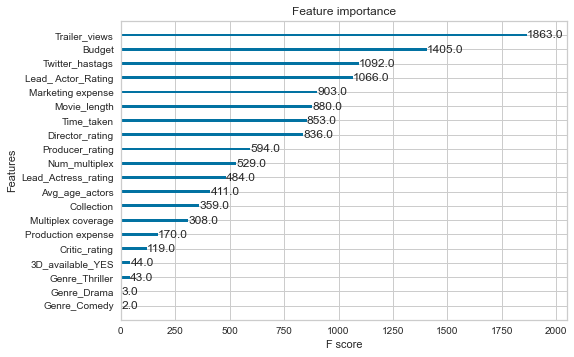

In [59]:
xgb.plot_importance(xgb_clf)

In [60]:
xgb_clf = xgb.XGBClassifier( n_estimators = 500, learning_rate =0.1, random_state=0 )


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [62]:
param_test = {
    'max_depth':range(3,10,2),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
    
}

In [65]:
grid_search = GridSearchCV(xgb_clf, param_test, n_jobs = -1, cv = 5, scoring = 'accuracy')

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_bin=256,
                                     max_cat_to_one...
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimator

In [67]:
cvxg_clf = grid_search.best_estimator_

In [71]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.2,
 'max_depth': 5,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [69]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.5657894736842105